In [1069]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt

In [1070]:
md = pd.read_csv('clean_metadata.csv')
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5368 non-null   int64  
 1   belongs_to_collection  5368 non-null   int64  
 2   budget                 5368 non-null   float64
 3   genres                 5368 non-null   object 
 4   id                     5368 non-null   int64  
 5   original_language      5368 non-null   object 
 6   overview               5368 non-null   object 
 7   popularity             5368 non-null   float64
 8   production_companies   5368 non-null   object 
 9   production_countries   5368 non-null   object 
 10  release_date           5368 non-null   object 
 11  revenue                5368 non-null   float64
 12  runtime                5368 non-null   float64
 13  spoken_languages       5368 non-null   object 
 14  title                  5368 non-null   object 
 15  vote

In [1071]:
rg1 = md.copy(deep=True)
column_list = [0, 4, 6, 7, 9, 13, 14, 15, 16]
rg1 = rg1.drop(columns=rg1.columns[column_list])
column_order = ['revenue', 'belongs_to_collection','budget', 'original_language', 'runtime', 'production_companies',
                'genres', 'release_date']
rg1 = rg1.reindex(columns=column_order)

In [1072]:
rg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   revenue                5368 non-null   float64
 1   belongs_to_collection  5368 non-null   int64  
 2   budget                 5368 non-null   float64
 3   original_language      5368 non-null   object 
 4   runtime                5368 non-null   float64
 5   production_companies   5368 non-null   object 
 6   genres                 5368 non-null   object 
 7   release_date           5368 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 335.6+ KB


We now perform some feature engineering. First, we change the original_language column to a simple boolean representing if the movie was originally released in English or not. 

In [1073]:
rg1['en'] = rg1['original_language'].apply(lambda x: 1 if x=='en' else 0)
rg1 = rg1.drop(['original_language'], axis=1)

We change production_companies to simply represent the number of production companies involved.

In [1074]:
rg1['production_companies'] = rg1['production_companies'].apply(lambda x: x.count('name'))   

We break apart the genre column into a one-hot encoding of all possible genres.

In [1075]:
genre_list = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
              'History', 'Horror', 'Music', 'Mystery', 'Romance',
              'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
for genre in genre_list:
    rg1['is_' + genre] = rg1['genres'].apply(lambda x: 1 if genre in x else 0)
rg1 = rg1.drop(['genres'], axis=1)

We convert release_date to the month of the release. 

In [1076]:
rg1['release_month'] = rg1['release_date'].apply(lambda x: int(x[-5:-3]))
rg1 = rg1.drop(['release_date'], axis=1)
rg1.head().transpose()

,0,1,2,3,4
revenue,373554033.0,262797249.0,81452156.0,187436818.0,64350171.0
belongs_to_collection,1.0,0.0,0.0,0.0,0.0
budget,30000000.0,65000000.0,16000000.0,60000000.0,35000000.0
runtime,81.0,104.0,127.0,170.0,106.0
production_companies,1.0,3.0,1.0,3.0,3.0
en,1.0,1.0,1.0,1.0,1.0
is_Action,0.0,0.0,0.0,1.0,1.0
is_Adventure,0.0,1.0,0.0,0.0,1.0
is_Animation,1.0,0.0,0.0,0.0,0.0
is_Comedy,1.0,0.0,1.0,0.0,0.0


Most importantly, we add a column 'return' that calculates the ratio of return for a movie (revenue/budget). 

In [1077]:
rg1['return'] = rg1['revenue'] / rg1['budget']

We now also create a column 'is_flop' from the new 'return' column, where 'is_flop' is 1 when 'return' < 1, and is 0 otherwise.

In [1078]:
rg1['is_flop'] = rg1['return'].apply(lambda x: 1 if x < 1 else 0)
rg1.head().transpose()

,0,1,2,3,4
revenue,3.735540e+08,2.627972e+08,8.145216e+07,1.874368e+08,6.435017e+07
belongs_to_collection,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
budget,3.000000e+07,6.500000e+07,1.600000e+07,6.000000e+07,3.500000e+07
runtime,8.100000e+01,1.040000e+02,1.270000e+02,1.700000e+02,1.060000e+02
production_companies,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00
en,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
is_Action,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
is_Adventure,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
is_Animation,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
is_Comedy,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00


We check to see how many flops there are compared to not flops. 

In [1079]:
rg1[rg1['is_flop']==0].shape

(3770, 29)

In [1080]:
rg1[rg1['is_flop']==1].shape

(1598, 29)

In [1085]:
rg1 = rg1.drop(['revenue'], axis=1)
rg1 = rg1.drop(['return'], axis=1)
rg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  5368 non-null   int64  
 1   budget                 5368 non-null   float64
 2   runtime                5368 non-null   float64
 3   production_companies   5368 non-null   int64  
 4   en                     5368 non-null   int64  
 5   is_Action              5368 non-null   int64  
 6   is_Adventure           5368 non-null   int64  
 7   is_Animation           5368 non-null   int64  
 8   is_Comedy              5368 non-null   int64  
 9   is_Crime               5368 non-null   int64  
 10  is_Documentary         5368 non-null   int64  
 11  is_Drama               5368 non-null   int64  
 12  is_Family              5368 non-null   int64  
 13  is_Fantasy             5368 non-null   int64  
 14  is_Foreign             5368 non-null   int64  
 15  is_H

We convert the pandas dataframe to a numpy array.

In [1086]:
data = rg1.to_numpy()

0.6936685288640596
Feature: 0, Score: -0.69365
Feature: 1, Score: -0.21328
Feature: 2, Score: -0.32518
Feature: 3, Score: 0.08560
Feature: 4, Score: -0.03152
Feature: 5, Score: 0.08393
Feature: 6, Score: 0.06231
Feature: 7, Score: -0.04031
Feature: 8, Score: -0.02890
Feature: 9, Score: -0.07833
Feature: 10, Score: -0.00102
Feature: 11, Score: 0.18693
Feature: 12, Score: -0.06007
Feature: 13, Score: 0.04129
Feature: 14, Score: 0.01339
Feature: 15, Score: 0.05983
Feature: 16, Score: -0.01211
Feature: 17, Score: 0.05995
Feature: 18, Score: 0.07262
Feature: 19, Score: -0.09923
Feature: 20, Score: 0.03028
Feature: 21, Score: -0.10203
Feature: 22, Score: 0.05968
Feature: 23, Score: -0.05271
Feature: 24, Score: -0.01422
Feature: 25, Score: -0.00123


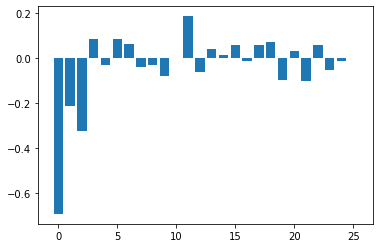

In [1087]:
X, y = data[:, :-1], data[:, -1]

# create testing and training datasets
Xp_train, Xp_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# normalize data
scaler = StandardScaler()
Xp_train = scaler.fit_transform(Xp_train)
Xp_test = scaler.transform(Xp_test)

model = LogisticRegression(multi_class='ovr')
model.fit(Xp_train, y_train)
y_pred = model.predict(Xp_test)
print(accuracy_score(y_test, y_pred))

# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()